In [1]:
import pandas as pd
import numpy as np 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/anubhav08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/anubhav08/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('Text Reviews.csv')
df.dtypes

title    object
dtype: object

In [3]:
print(df.shape)

(29, 1)


In [4]:
messages = " ".join([str(i) for i in df['title']])
words = word_tokenize(messages)

In [5]:
messages

"Feeling better to put our plants pot on it. Terrace luk classy nd clean Very bad stuff.. 3rd class quality Used it for placing potted plants arranged in a nice manner.. Six big sized pots . Thaaàaaank you... Overall good but stand is not stable as well as wire not attached with stand All and all ok product for the price Very nice good....but edges are not finished cutting... Sharpen also...any way product was good quality... Good and durable Joint welding is very good Cannot put big pots on it Strong for heavy pots also...so I recommend to buy... Sturdy & attractive. The dimensions are not as per specifications provided in the description. It is 60X20X10 cm. Otherwise the workmanship is very good. All the pegs are properly leveled. . It is actually good and it's size looks perfect too. Nice product for my small balcony garden.... Now it's become easy to clean the balcony floor. It's a sturdy addition to my balcony. Nice looking. A must buy at such a low price . Good material Product i

In [6]:
def clean_words(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [7]:
lowered = clean_words(words)

In [8]:
bow = Counter(lowered)
bow

Counter({'feeling': 1,
         'better': 2,
         'put': 2,
         'plant': 4,
         'pot': 10,
         'terrace': 1,
         'luk': 1,
         'classy': 1,
         'nd': 1,
         'clean': 3,
         'bad': 1,
         'stuff': 2,
         'class': 1,
         'quality': 4,
         'used': 2,
         'placing': 2,
         'potted': 1,
         'arranged': 1,
         'nice': 4,
         'manner': 1,
         'six': 1,
         'big': 3,
         'sized': 1,
         'thaaàaaank': 1,
         'overall': 2,
         'good': 15,
         'stand': 10,
         'stable': 1,
         'well': 1,
         'wire': 1,
         'attached': 1,
         'ok': 2,
         'product': 11,
         'price': 2,
         'edge': 1,
         'finished': 1,
         'cutting': 1,
         'sharpen': 1,
         'also': 3,
         'way': 1,
         'durable': 1,
         'joint': 1,
         'welding': 1,
         'strong': 2,
         'heavy': 1,
         'recommend': 3,
         'buy

In [9]:
data = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [10]:
data = data.head(10)

<AxesSubplot:xlabel='frequency', ylabel='word'>

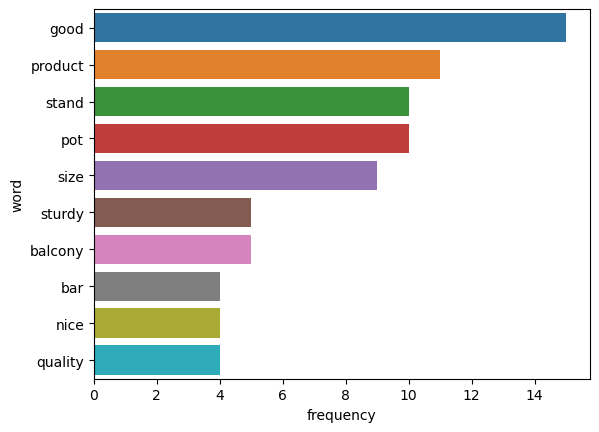

In [11]:
sns.barplot(x='frequency',y='word',data=data)